<a href="https://colab.research.google.com/github/pankaj18/Neural_network_for_stock_price_Prediction/blob/master/LSTM_for_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
import tensorflow as tf
import keras
from keras.models import Sequential,load_model
from keras.layers import Dense,LSTM,Dropout

In [3]:
data=pd.read_csv("https://github.com/pankaj18/Neural_network_for_stock_price_Prediction/raw/master/AAPL.csv")

In [4]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


# Preprocessing
take only Apple open price for prediction.
divide data into training and test data into 80% and 20% respectively.
then scale data using Minmax scaler

In [10]:
df=data['open'].values
print(df.shape)
df=df.reshape(-1,1)
print(df.shape)
print(type(df))

(1259,)
(1259, 1)
<class 'numpy.ndarray'>


In [11]:
train_idx=int(df.shape[0]*0.8)
train_data=df[:train_idx]
test_data=df[train_idx:]
print(train_data.shape)
print(test_data.shape)

(1007, 1)
(252, 1)


In [14]:
scaler=MinMaxScaler()
train_data_s=scaler.fit_transform(train_data)
test_data_s=scaler.transform(test_data)

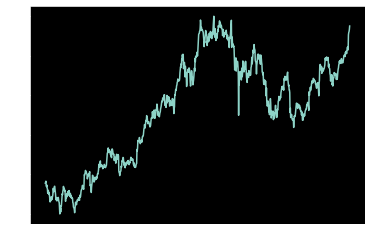

In [13]:
plt.plot(train_data_s)

Create dataset function to divide train and test data into rolling windows of size 50. The next value after window is used as label.

In [46]:
def create_dataset(data,window_len):
  x=[]
  y=[]
  for i in range(len(data)-window_len):
    x.append(data[i:i+window_len,0])
    y.append(data[i+window_len,0]) 
  x=np.array(x)
  #print(x.shape)
  y=np.array(y)
  return x,y

In [47]:
x_train,y_train=create_dataset(train_data_s,window_len=50)
x_test,y_test=create_dataset(test_data_s,window_len=50)

In [48]:
print(x_train.shape)
print(y_train.shape)

(957, 50)
(957,)


In [49]:
x_train[:1]

array([[0.15550899, 0.16002875, 0.16546966, 0.1432353 , 0.13837263,
        0.14619996, 0.1321915 , 0.12602681, 0.10489581, 0.11077074,
        0.11908522, 0.10095558, 0.10928904, 0.10137187, 0.09043563,
        0.07199725, 0.06057385, 0.08412669, 0.06603248, 0.07561229,
        0.07552245, 0.08609681, 0.07317274, 0.0810899 , 0.09030909,
        0.09667117, 0.12929896, 0.1255384 , 0.11252448, 0.12040496,
        0.13868011, 0.14003654, 0.12380363, 0.11180072, 0.09748478,
        0.07163663, 0.07845043, 0.08277153, 0.06603248, 0.06666515,
        0.06939446, 0.07254007, 0.08269814, 0.08347632, 0.07055098,
        0.06073581, 0.0583861 , 0.03076649, 0.        , 0.00844228]])

In [50]:
#reshaping for LSTM
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print(x_train.shape)
print(x_test.shape)

(957, 50, 1)
(202, 50, 1)


In [51]:
model=Sequential()
model.add(LSTM(units=96,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(1))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 96)            37632     
_________________________________________________________________
dropout (Dropout)            (None, 50, 96)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 96)                74112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 9

In [53]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,epochs=50,batch_size=32)


Epoch 1/50
30/30 [==============================] - 4s 118ms/step - loss: 0.0395
Epoch 2/50
30/30 [==============================] - 4s 117ms/step - loss: 0.0058
Epoch 3/50
30/30 [==============================] - 3s 114ms/step - loss: 0.0047
Epoch 4/50
30/30 [==============================] - 3s 115ms/step - loss: 0.0046
Epoch 5/50
30/30 [==============================] - 3s 114ms/step - loss: 0.0038
Epoch 6/50
30/30 [==============================] - 4s 120ms/step - loss: 0.0043
Epoch 7/50
30/30 [==============================] - 4s 124ms/step - loss: 0.0042
Epoch 8/50
30/30 [==============================] - 4s 121ms/step - loss: 0.0046
Epoch 9/50
30/30 [==============================] - 4s 121ms/step - loss: 0.0038
Epoch 10/50
30/30 [==============================] - 4s 117ms/step - loss: 0.0037
Epoch 11/50
30/30 [==============================] - 3s 114ms/step - loss: 0.0039
Epoch 12/50
30/30 [==============================] - 3s 114ms/step - loss: 0.0035
Epoch 13/50
30/30 [======

NameError: ignored

In [54]:
model.save('stock_pred_aapl.h5')

In [55]:
ls

sample_data/  stock_pred_aapl.h5


In [56]:
model1=load_model('stock_pred_aapl.h5')

In [59]:
predictions=model1.predict(x_test)
predictions=scaler.inverse_transform(predictions)

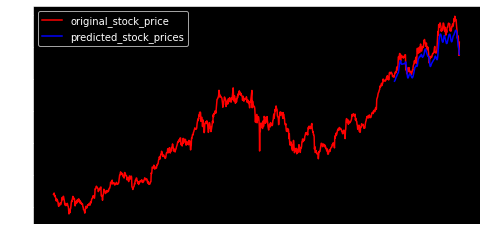

In [68]:
fig,ax=plt.subplots(figsize=(8,4))
plt.plot(df,color='red',label='original_stock_price')
#plt.plot(range(50,len(y_train)+50))
plt.plot(range(train_idx+50,train_idx+len(test_data)),predictions,color='blue',label='predicted_stock_prices')
plt.legend()

In [63]:
predictions.shape

(202, 1)

In [66]:
len(range(train_idx+50,train_idx+len(test_data)))

202

In [67]:
range(train_idx+50,train_idx+len(test_data))

range(1057, 1259)

In [74]:
y_test.shape

(202,)

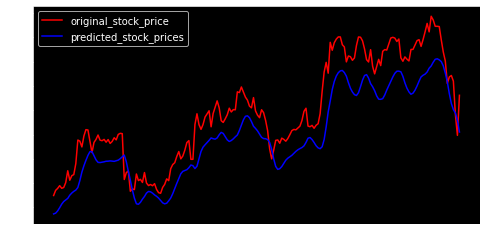

In [78]:
y_true=scaler.inverse_transform(y_test.reshape(-1, 1))
fig,ax=plt.subplots(figsize=(8,4))
plt.plot(y_true,color='red',label='original_stock_price')
#plt.plot(range(50,len(y_train)+50))
plt.plot(predictions,color='blue',label='predicted_stock_prices')
plt.legend()